<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW2-4 - Lachin Naghashyar</h1>

<h2 style="color:#659FFF;">K-means</h2>

- step1: Assign each point randomly to one of the k clusters.
- step2: Calculate the new centroid of each cluster to be the average of its points.
- step3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Q1: K-means is really similar to competitive learning algorithm (also some categorize k-means to be a competitive algorithm). They both Select the cluster with its weight vector(center) closest to the new input. And also set the new weight vector to running average of all points in that cluster.
The difference is that we have a predefined set of centers and points in competitive learning and each time **add** new input points (one by one) to them. Whereas in k-means, we have all the input data in the first step and initialize the clusters at random and then iterate over all the points in step 3 and after only after one whole iteration, update the centroid values.
It seems that we can have some changes in k-means that they have almost the same results. If we choose the centroids to be the same as the ones in competitive learning and have an almost good distance from the margins of each cluster, then after updating them for each new input point, we can be almost sure that it won't change as it would when it was chosen randomly.

Q2: K-means algorithm converges or in other words, J (sum of distances from centroid for all clusters) converges. It does not necessarily converge to the global optimum, but it will converge.
The reason for that is that in each iteration, J decreases because every time that we choose a new center for a given point, we choose the one which is the nearest and has the minimum amount of distance from it (we have the previous one and the new one will have a distance smaller or equal to that). In addition, centers get updated to the average value in each cluster. Also, we know that if the previous one is the same as the new one, the next one will also be the same. So in this way, J will decrease and converge to a min value in a finite number of iterations.

Q3: k-means and EM algorithms are similar, and we can see E-step as the 2nd step in k-means and M-step as 3rd one.
In E-step we are calculating the posterior distribution of v(cause or the centroid) for each data point. This is the same as computing centroids based on input data points(just their average here) whereas it has a more probabilistic way in EM.
In M-step, parameters of $G$ are updated. For each of the clusters, the mean and variance are computed using that cluster’s posterior probabilities of all data points. It is the same as assigning points to centroids such that it is assigned to the closest one which is most likely. Though in k-means it is assigned to only one cluster and is not


This is an implementation of k-means algorithm for image segmentation.

First I start by reading the input data which is an image. I store the rgb elements of each pixel in arrays R, G and B which each represent the corresponding color.

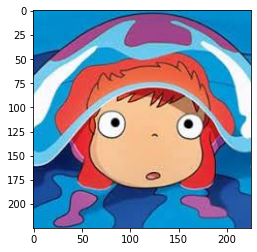

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

path = "ponyo.jpeg"
img = cv2.imread(path)
height, width, _ = img.shape
B, G, R = cv2.split(img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


Assume we want to divide the pictures to k clusters or segments.
<br>
In the first step, we start by assigning a random number from 0 to k-1 to each point.

In [3]:
import random

def K_means(r, g, b, n, k, h, w, max_num_iter=20):
    centers_change = True
    iterations = 0
    J = []
    clusters = np.array(random.choices(range(0, k), k=n))  # at first, clusters are chosen randomly

    centers_r, centers_g, centers_b = assign_center(r, g, b, k, clusters)
    # then iterate until the centers get fixed
    while centers_change:
        j = 0
        for i in range(n):
            clusters[i], distance = assign_cluster(r[i], g[i], b[i], k, centers_r, centers_g, centers_b)
            j += distance
        J.append(j)

        prev_r, prev_g, prev_b = centers_r.copy(), centers_g.copy(), centers_b.copy()
        centers_r, centers_g, centers_b = assign_center(r, g, b, k, clusters)

        diff = np.abs(centers_r - prev_r) + np.abs(centers_g - prev_g) + np.abs(centers_b - prev_b)
        if np.sum(diff) < k or iterations == max_num_iter:
            centers_change = False
        iterations += 1

    res = get_result(k, h, w, clusters, centers_r, centers_g, centers_b)
    cv2.imwrite("resQ4/k=" + str(k) + "-iter=" + str(iterations) + ".jpg", res)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.show()

    plt.plot(np.arange(0, iterations), J)
    plt.show()


In the function below, I start updating the cluster centers to have the mean value of their points in them.

In [4]:
def assign_center(r, g, b, k, clusters):
    centers_r, centers_g, centers_b = np.ndarray((k, 1)), np.ndarray((k, 1)), np.ndarray((k, 1))
    for cluster_num in range(k):
        region = clusters == cluster_num
        if region.size > 0:
            rk, gk, bk = r[region], g[region], b[region]
            r_mean, g_mean, b_mean = np.mean(rk), np.mean(gk), np.mean(bk)
            centers_r[cluster_num], centers_g[cluster_num], centers_b[cluster_num] = r_mean, g_mean, b_mean
    return centers_r, centers_g, centers_b


Then we continue by finding the closest center to each data point. I did this with the function below.
It basically calculates the distance between each cluster center and the data point(r, g, b) and returns the one
with the minimum distance.

In [5]:
def assign_cluster(r, g, b, k, centers_r, centers_g, centers_b):
    min_distance, cluster = None, 0
    for i in range(k):
        distance = calculate_distance(r, g, b, centers_r[i], centers_g[i], centers_b[i])
        if min_distance is None or distance < min_distance:
            min_distance, cluster = distance, i
    return cluster, min_distance

In [6]:
def calculate_distance(r1, g1, b1, r2, g2, b2):
    return np.sqrt(np.power(r1 - r2, 2) + np.power(g1 - g2, 2) + np.power(b1 - b2, 2))

After finding the best match for each data point, I continued by updating the center of each cluster to the
mean value of the points it owns. Then I repeated this process until the centers don't change (or mostly did not change and the iterations were not more than a max value)

Since I was working on r, g and b arrays, after having the right centers I build r, g and b arrays based on those centers and then merge them to form an image.

In [7]:
def get_result(k, h, w, clusters, centers_r, centers_g, centers_b):
    r, g, b = np.ndarray((n, 1)), np.ndarray((n, 1)), np.ndarray((n, 1))
    for i in range(k):
        region = clusters == i
        r[region], g[region], b[region] = centers_r[i], centers_g[i], centers_b[i]
    r, g, b = np.reshape(r, (h, w)), np.reshape(g, (h, w)), np.reshape(b, (h, w))
    return cv2.merge((b.astype('uint8'), g.astype('uint8'), r.astype('uint8')))


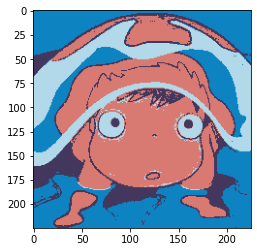

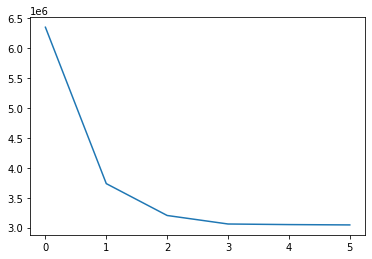

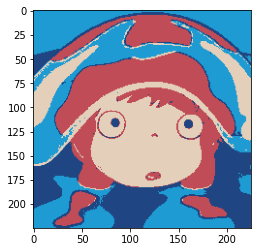

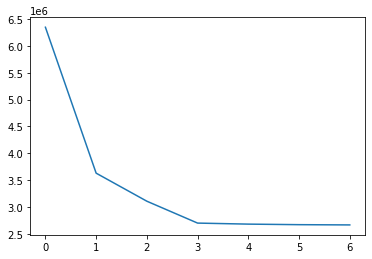

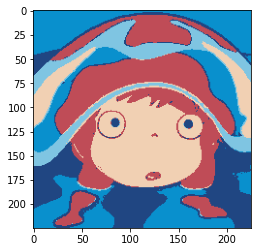

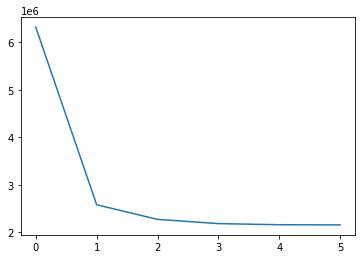

/Users/Lachin/PycharmProjects/neuroscience/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Lachin/PycharmProjects/neuroscience/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


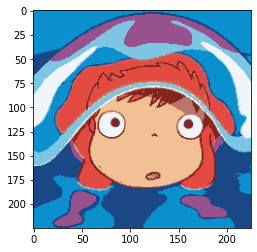

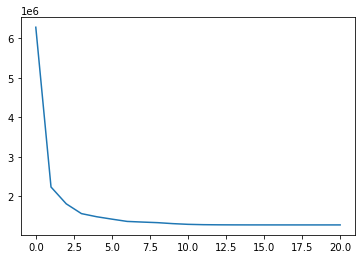

In [8]:
n = height * width
R, G, B = np.reshape(R, (n, 1)), np.reshape(G, (n, 1)), np.reshape(B, (n, 1))
K_means(R, G, B, n, 4, height, width)
K_means(R, G, B, n, 4, height, width)
K_means(R, G, B, n, 5, height, width)
K_means(R, G, B, n, 10, height, width)